In [2]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Reading the file
df=pd.read_csv("Electric_Production.csv",index_col=0,parse_dates=True)

In [4]:
# Have a look at data
df.head()

,Demand
DATE,
1985-01-01,72.51
1985-02-01,70.67
1985-03-01,62.45
1985-04-01,57.47
1985-05-01,55.32


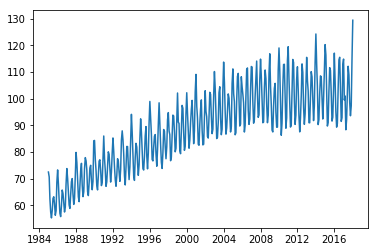

In [5]:
# plotting to see the current pattern in data
plt.plot(df)

###### ___ its more looking like the demand is increasing by year.

In [6]:
# Check for stationarity using the Dicky Fuller Test 
from statsmodels.tsa.stattools import adfuller
X = df.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.256981
p-value: 0.186218
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571


##### ---here we can see that our data is non-stationary because by using dicky fuller test we got p-value greater than the significance level(0.05).
--- Therefore we will be using simple exponential smoothing model for this time series data.

## Simple exponential smoothing

In [7]:
def simple_exp_smooth(d,extra_periods,alpha):  


  d = np.array(d)  # Transform the input into a numpy array  

  cols = len(d)  # Historical period length  

  d = np.append(d,[np.nan]*extra_periods)  # Append np.nan into the demand array to cover future periods  



  f = np.full(cols+extra_periods,np.nan)  # Forecast array  

  f[0] = d[0]  # initialization of first forecast  

    

  # Create all the t+1 forecasts until end of historical period  

  for t in range(1,cols+1):  

    f[t] = alpha*d[t-1]+(1-alpha)*f[t-1]  
    f[cols+1:] = f[t]  # Forecast for all extra periods  


  df = pd.DataFrame.from_dict({"Demand":d,"Forecast":f,"Error":f-d}) 
  return df


In [12]:
df_elc =simple_exp_smooth(df,7,0.07)

---here i am using alpha = 0.07 and extra_peroids=7

In [14]:
# For KPI Calculation
MAE = df_elc["Error"].abs().mean()  
print("MAE:",round(MAE,2)) 
RMSE = np.sqrt((df_elc["Error"]**2).mean())
print("RMSE:",round(RMSE,2))

MAE: 6.89
RMSE: 8.33


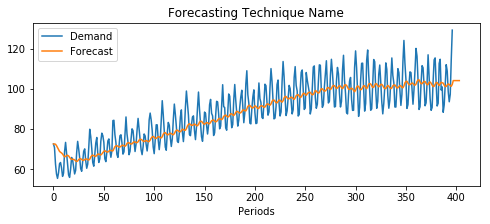

In [18]:
# lets plot 
df_elc.index.name = "Periods"
df_elc[["Demand","Forecast"]].plot(figsize=(8,3),title="Forecasting Technique Name",style=["-","-"])  
plt.show()


##### --- here in this chart we can see there is a gradual increase in forecast upto the period 300 and after that its more looking like constant not that much changes.
